# Passos iniciais

In [ ]:
# Importando o Dataset
import zipfile
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import re
import string

In [ ]:
from pandas.core.frame import DataFrame
twitter_path = 'https://github.com/hype-usp/Grupos-de-estudos/blob/main/products.zip?raw=true'
twitter_data = pd.read_csv(twitter_path, compression='zip')
df = twitter_data

In [ ]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [ ]:
value_count=df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

value_count

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [ ]:
df['emotion_in_tweet_is_directed_at'].unique() 

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
import re
import string
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, 
    remove punctuation, remove read errors,
    and remove words containing numbers.'''    
    text = str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('�', ' ', text)    
    return text

In [ ]:
round1 = lambda x: clean_text_round1(x)# Clean Speech Text
df['tweet_text_alterado'] = df['tweet_text'].apply(round1)# Visually Inspect

In [ ]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_text_alterado
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,i have a iphone after hrs tweeting at...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipad i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad also the...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this year s festival isn t as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa m...
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,wave buzz rt mention we interrupt your re...
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,google s zeiger a physician never reported po...
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,some verizon iphone customers complained their...


In [ ]:
def nouns(text):
  is_noun = lambda pos: pos[:2] == 'NN'
  tokenized = word_tokenize(text)
  wordnet_lemmatizer = WordNetLemmatizer()
  all_nouns = [wordnet_lemmatizer.lemmatize(word) for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
  return ' '.join(all_nouns)

In [ ]:
data_nouns = pd.DataFrame(df["tweet_text_alterado"].apply(nouns))
data_nouns.head()

,tweet_text_alterado
0,i iphone hr tweeting rise austin plugin statio...
1,jessedee ipad iphone app appreciate design t sxsw
2,swonderlin ipad sale sxsw
3,sxsw i year s festival isn t year iphone app sxsw
4,sxtxstate stuff fri sxsw mayer google tim o bo...


In [ ]:
df['tweet_text_alterado'] = df['tweet_text_alterado'].str.replace('iphone', '')
df['tweet_text_alterado'] = df['tweet_text_alterado'].str.replace('ipad', '')
df['tweet_text_alterado'] = df['tweet_text_alterado'].str.replace('google', '')
df['tweet_text_alterado'] = df['tweet_text_alterado'].str.replace('android', '')
df['tweet_text_alterado'] = df['tweet_text_alterado'].str.replace('apple', '')
df['tweet_text_alterado'] = df['tweet_text_alterado'].str.replace('android app', '')
df['tweet_text_alterado'] = df['tweet_text_alterado'].str.replace('other google product or service', '')
df['tweet_text_alterado'] = df['tweet_text_alterado'].str.replace('other apple product or service', '')
df['tweet_text_alterado'] = df['tweet_text_alterado'].str.replace('ipad or iphone app', '')
df['tweet_text_alterado'] = df['tweet_text_alterado'].str.replace('samsung', '')
df['tweet_text_alterado'] = df['tweet_text_alterado'].str.replace('i pad', '')

In [ ]:
data_nouns['tweet_text_alterado'][1]

'jessedee ipad iphone app appreciate design t sxsw'

# Experimento 1: Sem Humano no loop


In [ ]:
stop_words_noun_agg = text.ENGLISH_STOP_WORDS

tv_noun = TfidfVectorizer(stop_words=stop_words_noun_agg, ngram_range = (1,1), max_df = 0.8, min_df = .01)
data_tv_noun = tv_noun.fit_transform(df["tweet_text_alterado"])
data_dtm_noun = pd.DataFrame(data_tv_noun.toarray(), columns=tv_noun.get_feature_names())
data_dtm_noun.index = df.index
data_dtm_noun.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amp,app,apps,austin,awesome,best,big,bing,blackberry,booth,...,use,users,using,ve,want,way,week,win,year,ûï
0,0.000000,0.000000,0.0,0.560234,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.000000,0.296757,0.0,0.000000,0.445938,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,0.000000,0.307742,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95147,0.0
4,0.338205,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [ ]:
def display_topics(model, feature_names, num_top_words, topic_names=None):
  for ix, topic in enumerate(model.components_):       
    if not topic_names or not topic_names[ix]:
      print("\nTopic ", ix)
    else:
      print("\nTopic: '",topic_names[ix],"'")
    print(", ".join([feature_names[i] \
      for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [ ]:
data_nouns["tweet_text_alterado"]

0       i iphone hr tweeting rise austin plugin statio...
1       jessedee ipad iphone app appreciate design t sxsw
2                               swonderlin ipad sale sxsw
3       sxsw i year s festival isn t year iphone app sxsw
4       sxtxstate stuff fri sxsw mayer google tim o bo...
                              ...                        
9088                                            ipad link
9089    wave buzz rt mention sxsw geek news link googl...
9090    google s zeiger physician ae relies physician ...
9091    verizon iphone customer time hour weekend cour...
9092    êîò£áââ £â ûârt mention go...
Name: tweet_text_alterado, Length: 9093, dtype: object

In [ ]:
nmf_model = NMF(4)# Learn an NMF model for given Document Term Matrix 'V' 
# Extract the document-topic matrix 'W'
topic = nmf_model.fit(data_dtm_noun)
doc_topic = nmf_model.fit_transform(data_dtm_noun)# Extract top words from the topic-term matrix 'H'
display_topics(nmf_model, tv_noun.get_feature_names(), 26)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,



Topic  0
mention, rt, amp, app, just, party, new, sxswi, free, check, like, win, come, thanks, great, time, mobile, ûï, awesome, apps, today, says, going, day, don, need

Topic  1
link, new, circles, social, app, launch, network, today, called, major, possibly, free, sxswi, check, mobile, apps, news, tech, amp, music, launching, party, big, facebook, download, gt

Topic  2
quot, social, new, circles, network, launch, like, panel, today, don, heard, called, mayer, marissa, cool, think, major, technology, best, need, possibly, search, future, mobile, rt, know

Topic  3
store, austin, pop, line, opening, temporary, downtown, popup, open, just, congress, rumor, launch, people, shop, link, rt, know, tech, day, guy, amp, set, time, buy, got


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
doc_topic

array([[0.00253695, 0.        , 0.0027854 , 0.05435479],
       [0.00937327, 0.01060657, 0.00259986, 0.003044  ],
       [0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.21934733, 0.        ],
       [0.00638707, 0.01963594, 0.00713965, 0.00274823],
       [0.09572293, 0.14157758, 0.        , 0.        ]])

In [ ]:
print(topic)

NMF(n_components=4)


In [ ]:
data_dtm_noun

,amp,app,apps,austin,awesome,best,big,bing,blackberry,booth,...,use,users,using,ve,want,way,week,win,year,ûï
0,0.000000,0.000000,0.0,0.560234,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.000000,0.296757,0.0,0.000000,0.445938,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,0.000000,0.307742,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95147,0.0
4,0.338205,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
9089,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.596059,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
9090,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
9091,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [ ]:
H = topic.components_
H

array([[5.52986770e-01, 4.45332283e-01, 1.13950117e-01, 8.44936930e-02,
        1.14663899e-01, 7.72167755e-02, 7.24433940e-02, 7.38717962e-02,
        4.00523014e-02, 8.18728672e-02, 5.65018489e-02, 5.11144932e-03,
        1.00684867e-01, 1.55861428e-01, 1.50669752e-02, 5.47212266e-02,
        1.42553639e-01, 5.56668637e-02, 0.00000000e+00, 7.50901058e-02,
        1.06995614e-01, 6.98160044e-02, 4.83428858e-02, 1.05349272e-01,
        6.91639991e-02, 6.49432190e-04, 1.84511205e-02, 1.90780893e-01,
        3.10384123e-02, 8.36290266e-02, 1.07204347e-01, 6.98661902e-02,
        8.84965760e-02, 1.28668781e-01, 4.52258161e-02, 3.94838128e-02,
        3.88273418e-02, 5.97426370e-02, 8.72812121e-02, 3.09021889e-01,
        6.08719254e-02, 4.85594293e-02, 4.25563389e-02, 1.53947638e-01,
        0.00000000e+00, 0.00000000e+00, 8.36519432e-02, 3.93000378e-02,
        8.28466789e-02, 8.84773242e-03, 9.10544547e-02, 7.31148103e-02,
        4.49694775e-02, 5.72520076e-02, 5.24833864e+00, 1.227286

In [ ]:
a = data_dtm_noun.columns
a

Index(['amp', 'app', 'apps', 'austin', 'awesome', 'best', 'big', 'bing',
       'blackberry', 'booth',
       ...
       'use', 'users', 'using', 've', 'want', 'way', 'week', 'win', 'year',
       'ûï'],
      dtype='object', length=104)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


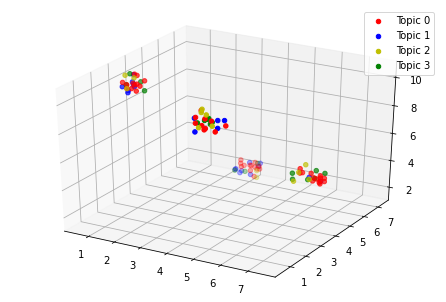

In [ ]:
A = np.concatenate((np.array( [ [1,3,10] + np.random.rand(3)-.5 for i in range(26) ] ),
                    np.array( [ [3,7,2] + np.random.rand(3)-.5 for i in range(26) ] ),
                    np.array( [ [5,1,10] + np.random.rand(3)-.5 for i in range(26) ] ),
                   np.array( [ [7,4,5] + np.random.rand(3)-.5 for i in range(26) ])),
                   axis = 0)

H = topic.components_
h = np.argmax(H,0)
fig = plt.figure()
ax = Axes3D(fig) #, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter(A[h==0][:,0],A[h==0][:,1],A[h==0][:,2],c='r', label='Topic 0');
ax.scatter(A[h==1][:,0],A[h==1][:,1],A[h==1][:,2],c='b', label='Topic 1');
ax.scatter(A[h==2][:,0],A[h==2][:,1],A[h==2][:,2],c='y', label='Topic 2');
ax.scatter(A[h==3][:,0],A[h==3][:,1],A[h==3][:,2],c='g', label='Topic 3');

ax.legend()

# Experimento 2: Utilizando Humano no loop


In [ ]:
stop_noun = ['today', 'thing', 'user', 'week', 'sxsw', 'rt', 'app',
             'circle', 'year', 'time', 'hour', 'apps', 'thanks', 'world',
             'day', 'sxswi', 'guy', 'talk', 'shop', 'way', 'store', 'tech',
             'technology', 'twitter', 'case', 'amp', 'event', 'fame', 'launch',
             'game', 'phone', 'photo', 'pop', 'product', 'popup', 'search', 'quot',
             'rumor', 'link', 'downtown', 'line', 'location', 'map', 'session', 'team',
             'austin', 'design', 'marissa', 'mention', 'music', 'network', 'panel', 'news',
             'bing', 'blackberry', 'booth', 'called', 'check', 'circles', 'temporary',
             'think', 've', 'ûï', 'congress', 'set', 'says', 'come', 'digital', 'coming', 'com',
             'facebook', 'download', 'possibly', 'products', 'social', 'right', 'don', 'future', 'going',
             'open', 'opening', 'people', 'got', 'gt', 'mobile', 'maps', 'mayer', 'hey', 'japan', 'heard',
             'make', 'know', 'just', 'launching', 'll'
             ]
stop_words_noun_agg = text.ENGLISH_STOP_WORDS.union(stop_noun)

tv_noun = TfidfVectorizer(stop_words=stop_words_noun_agg, ngram_range = (1,1), max_df = 0.8, min_df = .01)
data_tv_noun = tv_noun.fit_transform(df["tweet_text_alterado"])
data_dtm_noun = pd.DataFrame(data_tv_noun.toarray(), columns=tv_noun.get_feature_names())
data_dtm_noun.index = df.index
data_dtm_noun.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,awesome,best,big,buy,cool,free,good,great,like,love,major,need,new,party,really,use,users,using,want,win
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.775933,0.0,0.0,0.0,0.0,0.630815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
stop_noun = ['sxswi', 've', 'ûï', 'll']
stop_words_noun_agg = text.ENGLISH_STOP_WORDS.union(stop_noun)

tv_noun = TfidfVectorizer(stop_words=stop_words_noun_agg, ngram_range = (1,1), max_df = 0.99, min_df = .01)
data_tv_noun = tv_noun.fit_transform(df["tweet_text_alterado"])
data_dtm_noun = pd.DataFrame(data_tv_noun.toarray(), columns=tv_noun.get_feature_names())
data_dtm_noun.index = df.index
data_dtm_noun.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amp,app,apps,austin,awesome,best,big,bing,blackberry,booth,...,today,twitter,use,users,using,want,way,week,win,year
0,0.000000,0.000000,0.0,0.560234,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.000000,0.331665,0.0,0.000000,0.498394,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.000000,0.307742,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95147
4,0.338205,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [ ]:
def display_topics(model, feature_names, num_top_words, topic_names=None):
  for ix, topic in enumerate(model.components_):       
    if not topic_names or not topic_names[ix]:
      print("\nTopic ", ix)
    else:
      print("\nTopic: '",topic_names[ix],"'")
    print(", ".join([feature_names[i] \
      for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [ ]:
data_nouns["tweet_text_alterado"]

0       i iphone hr tweeting rise austin plugin statio...
1       jessedee ipad iphone app appreciate design t sxsw
2                               swonderlin ipad sale sxsw
3       sxsw i year s festival isn t year iphone app sxsw
4       sxtxstate stuff fri sxsw mayer google tim o bo...
                              ...                        
9088                                            ipad link
9089    wave buzz rt mention sxsw geek news link googl...
9090    google s zeiger physician ae relies physician ...
9091    verizon iphone customer time hour weekend cour...
9092    êîò£áââ £â ûârt mention go...
Name: tweet_text_alterado, Length: 9093, dtype: object

In [ ]:
nmf_model = NMF(4)# Learn an NMF model for given Document Term Matrix 'V' 
# Extract the document-topic matrix 'W'
topic = nmf_model.fit(data_dtm_noun)
doc_topic = nmf_model.fit_transform(data_dtm_noun)# Extract top words from the topic-term matrix 'H'
display_topics(nmf_model, tv_noun.get_feature_names(), 26)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,



Topic  0
mention, rt, amp, app, just, party, new, free, check, like, win, come, thanks, today, great, time, mobile, apps, says, awesome, day, going, don, need, case, make

Topic  1
link, new, circles, app, social, launch, network, today, called, major, possibly, free, check, apps, mobile, news, tech, amp, music, launching, party, big, download, shop, facebook, gt

Topic  2
quot, social, new, circles, network, launch, like, today, panel, don, heard, called, mayer, marissa, cool, major, think, technology, best, possibly, need, search, future, mobile, rt, know

Topic  3
store, austin, pop, line, opening, temporary, downtown, popup, open, just, congress, launch, rumor, people, shop, know, rt, link, amp, tech, day, guy, set, time, buy, got


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
doc_topic

array([[0.00256236, 0.        , 0.00290911, 0.05412167],
       [0.00913915, 0.01163921, 0.00193686, 0.00256769],
       [0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.21849541, 0.        ],
       [0.00656676, 0.01842894, 0.00752697, 0.00336261],
       [0.09521824, 0.14282702, 0.        , 0.        ]])

In [ ]:
print(topic)

NMF(n_components=4)


In [ ]:
data_dtm_noun

,amp,app,apps,austin,awesome,best,big,bing,blackberry,booth,...,today,twitter,use,users,using,want,way,week,win,year
0,0.000000,0.000000,0.0,0.560234,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.000000,0.331665,0.0,0.000000,0.498394,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.000000,0.307742,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95147
4,0.338205,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
9089,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.596059,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
9090,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
9091,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [ ]:
H = topic.components_
H

array([[5.40715072e-01, 4.43021779e-01, 1.18032272e-01, 8.77934572e-02,
        1.11576896e-01, 7.94132357e-02, 7.19596102e-02, 7.13840835e-02,
        3.88322102e-02, 8.07466587e-02, 5.68499369e-02, 1.80001139e-02,
        9.89642281e-02, 1.54593613e-01, 3.42504803e-02, 5.28347438e-02,
        1.41675387e-01, 5.72005594e-02, 0.00000000e+00, 7.41015007e-02,
        1.08921849e-01, 6.76410561e-02, 4.72701375e-02, 1.04192674e-01,
        6.76620712e-02, 0.00000000e+00, 1.94424834e-02, 1.91583877e-01,
        3.02740011e-02, 8.94629991e-02, 1.05193119e-01, 6.87483280e-02,
        9.02574692e-02, 1.24919157e-01, 4.64694457e-02, 3.81238289e-02,
        3.92512248e-02, 5.87985341e-02, 8.84333281e-02, 3.09443051e-01,
        6.12946926e-02, 6.07443330e-02, 4.42028372e-02, 1.52199508e-01,
        0.00000000e+00, 0.00000000e+00, 3.82112309e-02, 8.11647272e-02,
        2.08897322e-02, 9.03955772e-02, 7.03465586e-02, 4.34792235e-02,
        5.52208396e-02, 5.29059212e+00, 1.19311573e-01, 5.907000

In [ ]:
a = data_dtm_noun.columns
a

Index(['amp', 'app', 'apps', 'austin', 'awesome', 'best', 'big', 'bing',
       'blackberry', 'booth', 'buy', 'called', 'case', 'check', 'circles',
       'com', 'come', 'coming', 'congress', 'cool', 'day', 'design', 'digital',
       'don', 'download', 'downtown', 'facebook', 'free', 'future', 'game',
       'going', 'good', 'got', 'great', 'gt', 'guy', 'heard', 'hey', 'japan',
       'just', 'know', 'launch', 'launching', 'like', 'line', 'link',
       'location', 'love', 'major', 'make', 'maps', 'marissa', 'mayer',
       'mention', 'mobile', 'music', 'need', 'network', 'new', 'news', 'open',
       'opening', 'panel', 'party', 'people', 'phone', 'pop', 'popup',
       'possibly', 'products', 'quot', 'really', 'right', 'rt', 'rumor',
       'says', 'search', 'session', 'set', 'shop', 'social', 'store', 'talk',
       'team', 'tech', 'technology', 'temporary', 'thanks', 'think', 'time',
       'today', 'twitter', 'use', 'users', 'using', 'want', 'way', 'week',
       'win', 'year'],


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


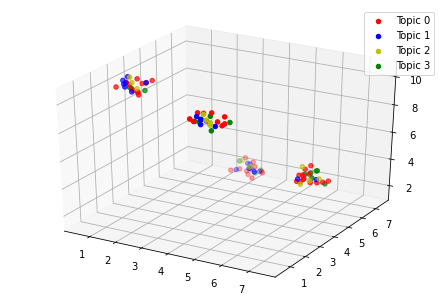

In [ ]:
A = np.concatenate((np.array( [ [1,3,10] + np.random.rand(3)-.5 for i in range(25) ] ),
                    np.array( [ [3,7,2] + np.random.rand(3)-.5 for i in range(25) ] ),
                    np.array( [ [5,1,10] + np.random.rand(3)-.5 for i in range(25) ] ),
                   np.array( [ [7,4,5] + np.random.rand(3)-.5 for i in range(25) ])),
                   axis = 0)

H = topic.components_
h = np.argmax(H,0)
fig = plt.figure()
ax = Axes3D(fig) #, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter(A[h==0][:,0],A[h==0][:,1],A[h==0][:,2],c='r', label='Topic 0');
ax.scatter(A[h==1][:,0],A[h==1][:,1],A[h==1][:,2],c='b', label='Topic 1');
ax.scatter(A[h==2][:,0],A[h==2][:,1],A[h==2][:,2],c='y', label='Topic 2');
ax.scatter(A[h==3][:,0],A[h==3][:,1],A[h==3][:,2],c='g', label='Topic 3');

ax.legend()

# Comparação

### Sem Humano no Loop <br>
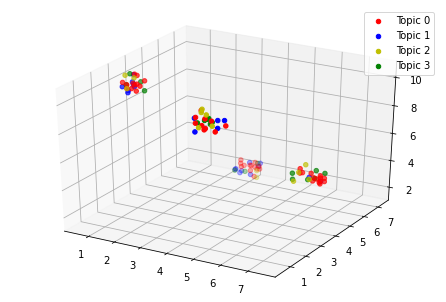 

### Utilizando Humano no Loop <br>
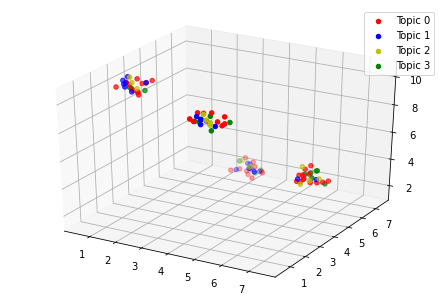